### Importing Necessary Packages

In [560]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

### Loading the Data

In [561]:
data = pd.read_csv('data\HousingData.csv')

### Exploring the Dataset

In [562]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [563]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [564]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [565]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [566]:
data.shape

(506, 14)

In [567]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [568]:
data.dropna(inplace=True)

In [569]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [570]:
data.shape

(394, 14)

In [571]:
data.groupby('MEDV').mean()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,,,,,,,,,,,,,
5.0,53.136300,0.000000,18.100000,0.000000,0.693000,5.568000,100.000,1.45750,24.0,666.00,20.20,390.935,26.785000
5.6,25.046100,0.000000,18.100000,0.000000,0.693000,5.987000,100.000,1.58880,24.0,666.00,20.20,396.900,26.770000
6.3,9.916550,0.000000,18.100000,0.000000,0.693000,5.852000,77.800,1.50040,24.0,666.00,20.20,338.160,29.970000
7.0,22.964735,0.000000,22.920000,0.000000,0.651000,4.966500,99.150,1.70680,14.0,688.50,20.15,216.160,30.475000
7.2,17.448200,0.000000,18.100000,0.000000,0.689500,5.855500,99.050,1.63040,24.0,666.00,20.20,212.075,29.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44.8,0.315330,0.000000,6.200000,0.000000,0.504000,8.266000,78.300,2.89440,8.0,307.00,17.40,385.050,4.140000
45.4,0.035780,20.000000,3.330000,0.000000,0.442900,7.820000,64.500,4.69470,5.0,216.00,14.90,387.310,3.760000
46.0,0.061290,20.000000,3.330000,1.000000,0.442900,7.645000,49.700,5.21190,5.0,216.00,14.90,377.070,3.010000


In [572]:
data = data.rename(columns={'MEDV': 'Price'})

In [573]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


#### Understanding the Correlation between various features in the dataset

In [574]:
correlation = data.corr()

<Axes: >

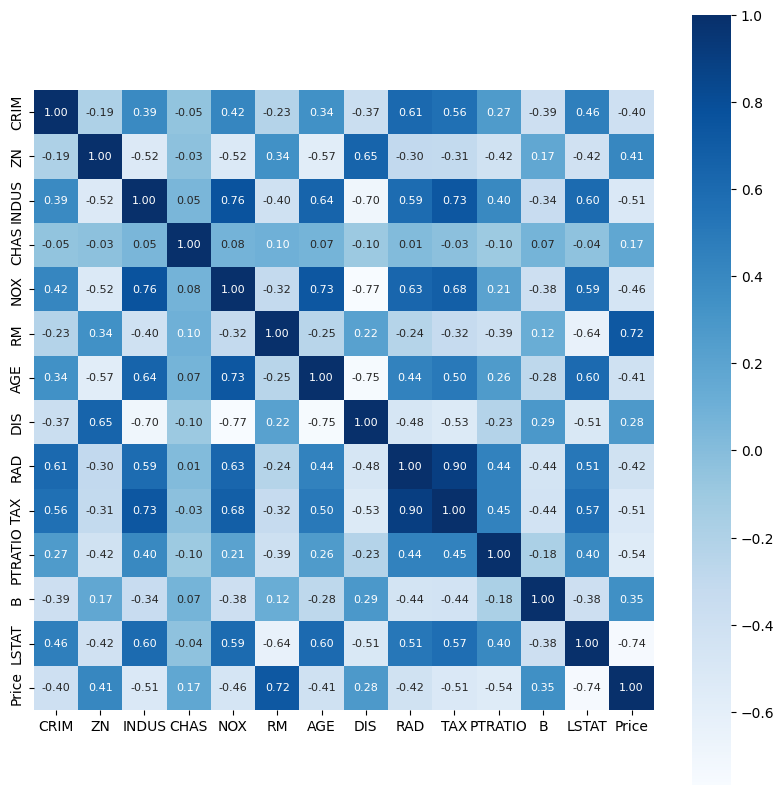

In [575]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

### Separating the Data and Labels

In [576]:
X = data.drop(columns='Price', axis=1)
y = data['Price']

In [577]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [578]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: Price, dtype: float64

### Splitting the Data into Training and Testing Data

In [579]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [580]:
print(X.shape, X_train.shape, X_test.shape)

(394, 13) (315, 13) (79, 13)


In [581]:
print(y.shape, y_train.shape, y_test.shape)

(394,) (315,) (79,)


### Model Training

In [582]:
model = XGBRegressor()

In [583]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

#### Evaluation

In [584]:
training_data_prediction = model.predict(X_train)

In [585]:
accuracy_score_1 = r2_score(training_data_prediction, y_train)

In [586]:
accuracy_score_2 = mean_absolute_error(training_data_prediction, y_train)

In [587]:
print("R squared error: ", accuracy_score_1)
print("Mean Absolute error: ", accuracy_score_2)

R squared error:  0.9999990966499009
Mean Absolute error:  0.006078408559163554


In [588]:
test_data_prediction = model.predict(X_test)

In [589]:
accuracy_score_3 = r2_score(test_data_prediction, y_test)

In [590]:
accuracy_score_4 = mean_absolute_error(test_data_prediction, y_test)

In [591]:
print("R squared error: ", accuracy_score_3)
print("Mean Absolute error: ", accuracy_score_4)

R squared error:  0.8251980893219621
Mean Absolute error:  2.254431766799734


#### Visualization

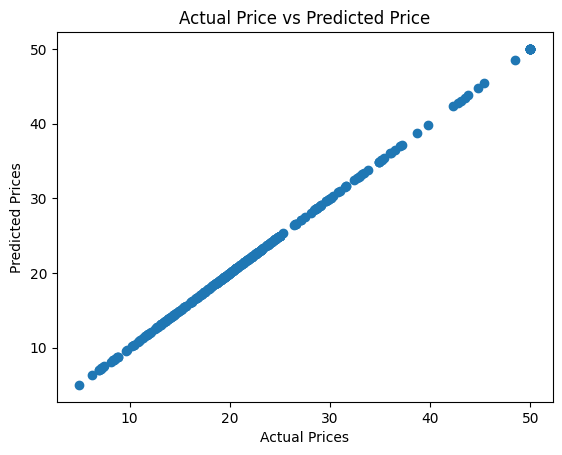

In [592]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()